## Máster en Big Data y Data Science

### Metodologías de gestión y diseño de proyectos de big data

#### AP2 - Extracción de reglas de pertenencia a grupos

##### Árboles de Decisión

---

En esta libreta se toman los resultados de la clusterización para realizar la extracción de reglas que permitan comprender de qué manera fueron conformados los grupos. 

---

### Carga de librerias a utilizar

In [67]:
# Se importan las librerias a utilizar
import pandas as pd
import numpy as np
import warnings

# Para registro de toda la experimentación
import mlflow

# Para la generación de los sets de train - test
from sklearn.model_selection import train_test_split

#Importaciones varias para la evaluación
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

### Lectura del dataset generado previamente

In [68]:
# Se hace la lectura del dataset del seminario y se obtiene su cabecera
datos = pd.read_csv('../../../data/final/resultados_kmeans_k3.csv', sep=';')
datos2 = pd.read_csv('../../../data/final/resultados_kmeans_k4.csv', sep=';')
datos.head()

,id_cliente,edad,importe_solicitado,duracion_credito,antiguedad_empleado,ingresos,tasa_interes,estado_credito,antiguedad_cliente,gastos_ult_12m,...,estado_cliente_PASIVO,genero_F,genero_M,nivel_educativo_DESCONOCIDO,nivel_educativo_POSGRADO_COMPLETO,nivel_educativo_POSGRADO_INCOMPLETO,nivel_educativo_SECUNDARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_INCOMPLETO,cluster
0,713061558.0,22,35000,3,123.0,59000,16.02,1,36.0,1088.0,...,False,False,True,False,False,False,False,True,False,1
1,768805383.0,21,1000,2,5.0,9600,11.14,0,39.0,1144.0,...,False,False,True,False,False,False,True,False,False,2
2,713982108.0,23,35000,2,4.0,65500,15.23,1,36.0,1887.0,...,False,False,True,False,False,False,False,True,False,1
3,710821833.0,24,35000,4,8.0,54400,14.27,1,54.0,1314.0,...,False,False,True,True,False,False,False,False,False,1
4,769911858.0,21,2500,2,2.0,9900,7.14,1,34.0,1171.0,...,False,True,False,False,False,False,True,False,False,2


### Armado de los sets de entrenamiento y testeo

In [69]:
# Se separan los atributos de datos de los de la etiqueta del dataset

labels = datos.cluster.values
labels = labels.astype('str') # Modificación para asignar el valor

features = datos[['edad', 'importe_solicitado', 'duracion_credito',
       'antiguedad_empleado', 'ingresos', 'tasa_interes',
       'estado_credito', 'antiguedad_cliente', 'gastos_ult_12m',
       'limite_credito_tc', 'personas_a_cargo',
       'situacion_vivienda_ALQUILER', 'situacion_vivienda_HIPOTECA',
       'situacion_vivienda_OTROS', 'situacion_vivienda_PROPIA',
       'objetivo_credito_EDUCACIÓN', 'objetivo_credito_INVERSIONES',
       'objetivo_credito_MEJORAS_HOGAR', 'objetivo_credito_PAGO_DEUDAS',
       'objetivo_credito_PERSONAL', 'objetivo_credito_SALUD', 'falta_pago_N',
       'falta_pago_Y', 'estado_civil_CASADO',
       'estado_civil_DESCONOCIDO', 'estado_civil_DIVORCIADO',
       'estado_civil_SOLTERO', 'estado_cliente_ACTIVO',
       'estado_cliente_PASIVO', 'genero_F', 'genero_M',
       'nivel_educativo_DESCONOCIDO', 'nivel_educativo_POSGRADO_COMPLETO',
       'nivel_educativo_POSGRADO_INCOMPLETO',
       'nivel_educativo_SECUNDARIO_COMPLETO',
       'nivel_educativo_UNIVERSITARIO_COMPLETO',
       'nivel_educativo_UNIVERSITARIO_INCOMPLETO']]

print(f"Vista de los datos del atributo target: \n{labels[:10]}")
print("-"*50)
print("Vista parcial de los datos sin el atributo target:")
features.head()



labels2 = datos2.cluster.values
labels2 = labels2.astype('str') # Modificación para asignar el valor

features2 = datos[['edad', 'importe_solicitado', 'duracion_credito',
       'antiguedad_empleado', 'ingresos', 'tasa_interes',
       'estado_credito', 'antiguedad_cliente', 'gastos_ult_12m',
       'limite_credito_tc', 'personas_a_cargo',
       'situacion_vivienda_ALQUILER', 'situacion_vivienda_HIPOTECA',
       'situacion_vivienda_OTROS', 'situacion_vivienda_PROPIA',
       'objetivo_credito_EDUCACIÓN', 'objetivo_credito_INVERSIONES',
       'objetivo_credito_MEJORAS_HOGAR', 'objetivo_credito_PAGO_DEUDAS',
       'objetivo_credito_PERSONAL', 'objetivo_credito_SALUD', 'falta_pago_N',
       'falta_pago_Y', 'estado_civil_CASADO',
       'estado_civil_DESCONOCIDO', 'estado_civil_DIVORCIADO',
       'estado_civil_SOLTERO', 'estado_cliente_ACTIVO',
       'estado_cliente_PASIVO', 'genero_F', 'genero_M',
       'nivel_educativo_DESCONOCIDO', 'nivel_educativo_POSGRADO_COMPLETO',
       'nivel_educativo_POSGRADO_INCOMPLETO',
       'nivel_educativo_SECUNDARIO_COMPLETO',
       'nivel_educativo_UNIVERSITARIO_COMPLETO',
       'nivel_educativo_UNIVERSITARIO_INCOMPLETO']]

print(f"Vista de los datos del atributo target: \n{labels2[:10]}")
print("-"*50)
print("Vista parcial de los datos sin el atributo target:")
features2.head()

Vista de los datos del atributo target: 
['1' '2' '1' '1' '2' '1' '0' '0' '1' '1']
--------------------------------------------------
Vista parcial de los datos sin el atributo target:
Vista de los datos del atributo target: 
['0' '3' '0' '0' '3' '0' '2' '2' '0' '0']
--------------------------------------------------
Vista parcial de los datos sin el atributo target:


,edad,importe_solicitado,duracion_credito,antiguedad_empleado,ingresos,tasa_interes,estado_credito,antiguedad_cliente,gastos_ult_12m,limite_credito_tc,...,estado_cliente_ACTIVO,estado_cliente_PASIVO,genero_F,genero_M,nivel_educativo_DESCONOCIDO,nivel_educativo_POSGRADO_COMPLETO,nivel_educativo_POSGRADO_INCOMPLETO,nivel_educativo_SECUNDARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_INCOMPLETO
0,22,35000,3,123.0,59000,16.02,1,36.0,1088.0,4010.0,...,True,False,False,True,False,False,False,False,True,False
1,21,1000,2,5.0,9600,11.14,0,39.0,1144.0,12691.0,...,True,False,False,True,False,False,False,True,False,False
2,23,35000,2,4.0,65500,15.23,1,36.0,1887.0,3418.0,...,True,False,False,True,False,False,False,False,True,False
3,24,35000,4,8.0,54400,14.27,1,54.0,1314.0,9095.0,...,True,False,False,True,True,False,False,False,False,False
4,21,2500,2,2.0,9900,7.14,1,34.0,1171.0,3313.0,...,True,False,True,False,False,False,False,True,False,False


In [70]:
# Se pasa a binarizar los atributos

data = pd.get_dummies(features)

data2 = pd.get_dummies(features2)

In [71]:
# Para evitar problemas con mlfow se hace una conversión de integer a double 
# de los atributos: 'importe_solicitado', 'duracion_credito', 'estado_credito'

# Se filtran las columnas del tipo integer
integer_columns = data.select_dtypes(include='int').columns

# Convert integer columns to double
data[integer_columns] = data[integer_columns].astype('float')


# Se filtran las columnas del tipo integer
integer_columns2 = data2.select_dtypes(include='int').columns

# Convert integer columns to double
data2[integer_columns2] = data[integer_columns2].astype('float')

In [72]:
# Se reparten los datos disponibles en conjuntos para entrenamiento y testeo

train_data, test_data, train_labels, test_labels = train_test_split(data, labels) 


train_data2, test_data2, train_labels2, test_labels2 = train_test_split(data, labels) 

# Toma por defecto 75% (entrenamiento) - 25% (testeo)

# Vista de los datos de entrenamiento para una fila

print(f"Un registro de entrenamiento: \n{train_data.iloc[1]}")
print("-"*50)
print(f"Label del registro: \n{train_labels[1]}\n")

print("#"*50)
print("#"*50)

# Vista de los datos de testeo para una fila

print(f"\nUn registro de testeo: \n{test_data.iloc[1]}")
print("-"*50)
print(f"Label del registro: \n{test_labels[1]}")

Un registro de entrenamiento: 
edad                                           24.0
importe_solicitado                          14000.0
duracion_credito                                4.0
antiguedad_empleado                             7.0
ingresos                                    65000.0
tasa_interes                                  15.31
estado_credito                                  0.0
antiguedad_cliente                             30.0
gastos_ult_12m                               8943.0
limite_credito_tc                            5181.0
personas_a_cargo                                1.0
situacion_vivienda_ALQUILER                   False
situacion_vivienda_HIPOTECA                    True
situacion_vivienda_OTROS                      False
situacion_vivienda_PROPIA                     False
objetivo_credito_EDUCACIÓN                    False
objetivo_credito_INVERSIONES                   True
objetivo_credito_MEJORAS_HOGAR                False
objetivo_credito_PAGO_DEUDAS     

In [73]:
# Configuración de la evaluación

def evaluar_modelo(modelo, test_data, test_labels):
    prediction = modelo.predict(test_data)
    print('Rendimiento obtenido:',accuracy_score(test_labels,prediction))
    print('Reporte de indicadores:\n',classification_report(test_labels,prediction))
    print('Matriz de confusión:')
    cm = confusion_matrix(test_labels, prediction, labels=modelo.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                   display_labels=modelo.classes_)
    disp.plot()
    plt.show()
    plt.close()

In [74]:
# Para obtener todos los parámetros y no solo los modificados

from sklearn import set_config

set_config(print_changed_only=False)

### Generación de modelos

Se pasa a configurar la serie de experimentos en **mlflow**

In [75]:
# Se establece un nombre para identificar la serie de experimentos

mlflow.set_experiment(experiment_name="Reglas - Prueba #1 - Kmeans K=3")
mlflow.autolog()

2024/07/20 19:08:43 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of sklearn. If you encounter errors during autologging, try upgrading / downgrading sklearn to a supported version, or try upgrading MLflow.
2024/07/20 19:08:43 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


#### Árboles de Decisión (TDIDT)

### Prueba número 1: Validación cruzada Random Kmeans 3

#### Validación cruzada

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Definir el clasificador de árbol de decisión
dt = DecisionTreeClassifier()

# Definir los parámetros a buscar
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': randint(1, 20),  # Rango para max_depth
    'min_samples_split': randint(2, 20),  # Rango para min_samples_split
    'min_samples_leaf': randint(1, 20)  # Rango para min_samples_leaf
}

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)

# Realizar la búsqueda aleatoria
random_search.fit(train_data, train_labels)

# Mostrar los mejores parámetros encontrados
print("Mejores hiperparámetros encontrados mediante RandomizedSearchCV:")
print(random_search.best_params_)

2024/07/20 19:12:02 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '426a4cd3a6c74d508e549a1f1683e011', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/07/20 19:12:31 INFO mlflow.sklearn.utils: Logging the 5 best runs, 95 runs will be omitted.


Mejores hiperparámetros encontrados mediante RandomizedSearchCV:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 6, 'splitter': 'random'}


#### Ajustar modelo con hiper parámetros

In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

with mlflow.start_run(run_name='Decision Tree_kmeans3_rcv'):
    dtc = DecisionTreeClassifier(max_depth=5, 
                                 criterion='gini', 
                                 min_samples_split=6,
                                 min_samples_leaf=10,
                                 splitter= 'random')

    dtc.fit(train_data, train_labels)

    # Se finaliza el registro
    mlflow.end_run()

In [88]:
dtc

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=10,
                       min_samples_split=6, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=None,
                       splitter='random')

Rendimiento obtenido: 0.6677186654643823
Reporte de indicadores:
               precision    recall  f1-score   support

           0       0.34      0.08      0.13       227
           1       0.68      0.97      0.80      1496
           2       0.36      0.02      0.04       495

    accuracy                           0.67      2218
   macro avg       0.46      0.36      0.32      2218
weighted avg       0.57      0.67      0.56      2218

Matriz de confusión:


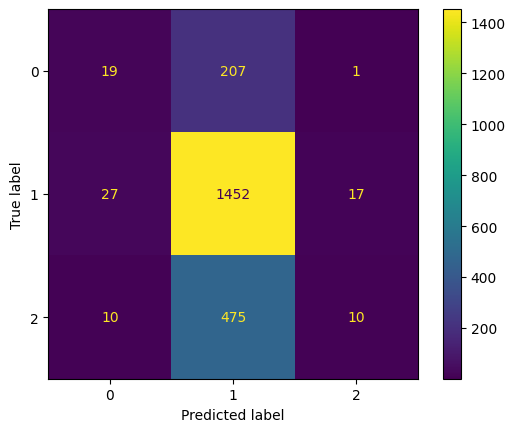

In [89]:
evaluar_modelo(dtc, test_data, test_labels)

#### Arbol de decision

In [90]:
# Plot the decision tree
plt.figure(figsize=(20, 10), dpi=700)

# Visualizar el árbol de decisiones
plot_tree(dtc, filled=True, feature_names=data.columns, class_names=labels)

# Mostrar el gráfico
plt.show()

### Prueba 2: Validacion cruzada en grid Kmeans 3

#### Validación cruzada

In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Definir el clasificador de árbol de decisión
dt = DecisionTreeClassifier()

# Definir los parámetros a buscar
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': randint(1, 20),  # Rango para max_depth
    'min_samples_split': randint(2, 20),  # Rango para min_samples_split
    'min_samples_leaf': randint(1, 20)  # Rango para min_samples_leaf
}

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)

# Realizar la búsqueda aleatoria
random_search.fit(train_data, train_labels)

# Mostrar los mejores parámetros encontrados
print("Mejores hiperparámetros encontrados mediante RandomizedSearchCV:")
print(random_search.best_params_)


2024/07/20 19:13:50 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '9f981d46f511465cb4d4518e74cb9434', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/07/20 19:14:21 INFO mlflow.sklearn.utils: Logging the 5 best runs, 95 runs will be omitted.


Mejores hiperparámetros encontrados mediante RandomizedSearchCV:
{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 16, 'min_samples_split': 10, 'splitter': 'random'}


#### Ajustar modelo con hiperparámetros

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

with mlflow.start_run(run_name='Decision Treekmeans3_gcv'):
    dtc2 = DecisionTreeClassifier(max_depth=3, 
                                 criterion='entropy', 
                                 min_samples_split=10,
                                 min_samples_leaf=16,
                                 splitter= 'random')

    dtc2.fit(train_data, train_labels)

    # Se finaliza el registro
    mlflow.end_run()

In [93]:
dtc2

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=16,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=None,
                       splitter='random')

Rendimiento obtenido: 0.6677186654643823
Reporte de indicadores:
               precision    recall  f1-score   support

           0       0.34      0.08      0.13       227
           1       0.68      0.97      0.80      1496
           2       0.36      0.02      0.04       495

    accuracy                           0.67      2218
   macro avg       0.46      0.36      0.32      2218
weighted avg       0.57      0.67      0.56      2218

Matriz de confusión:


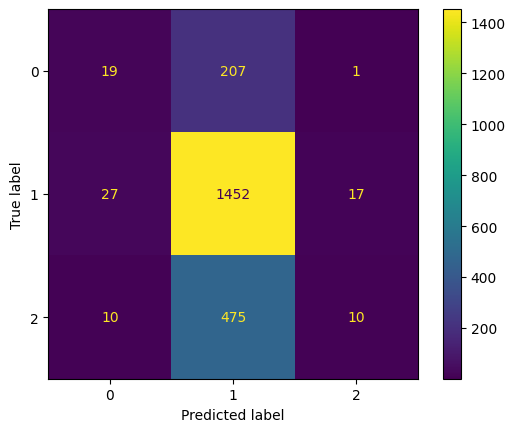

In [94]:
evaluar_modelo(dtc, test_data, test_labels)

#### Arbol de decisión

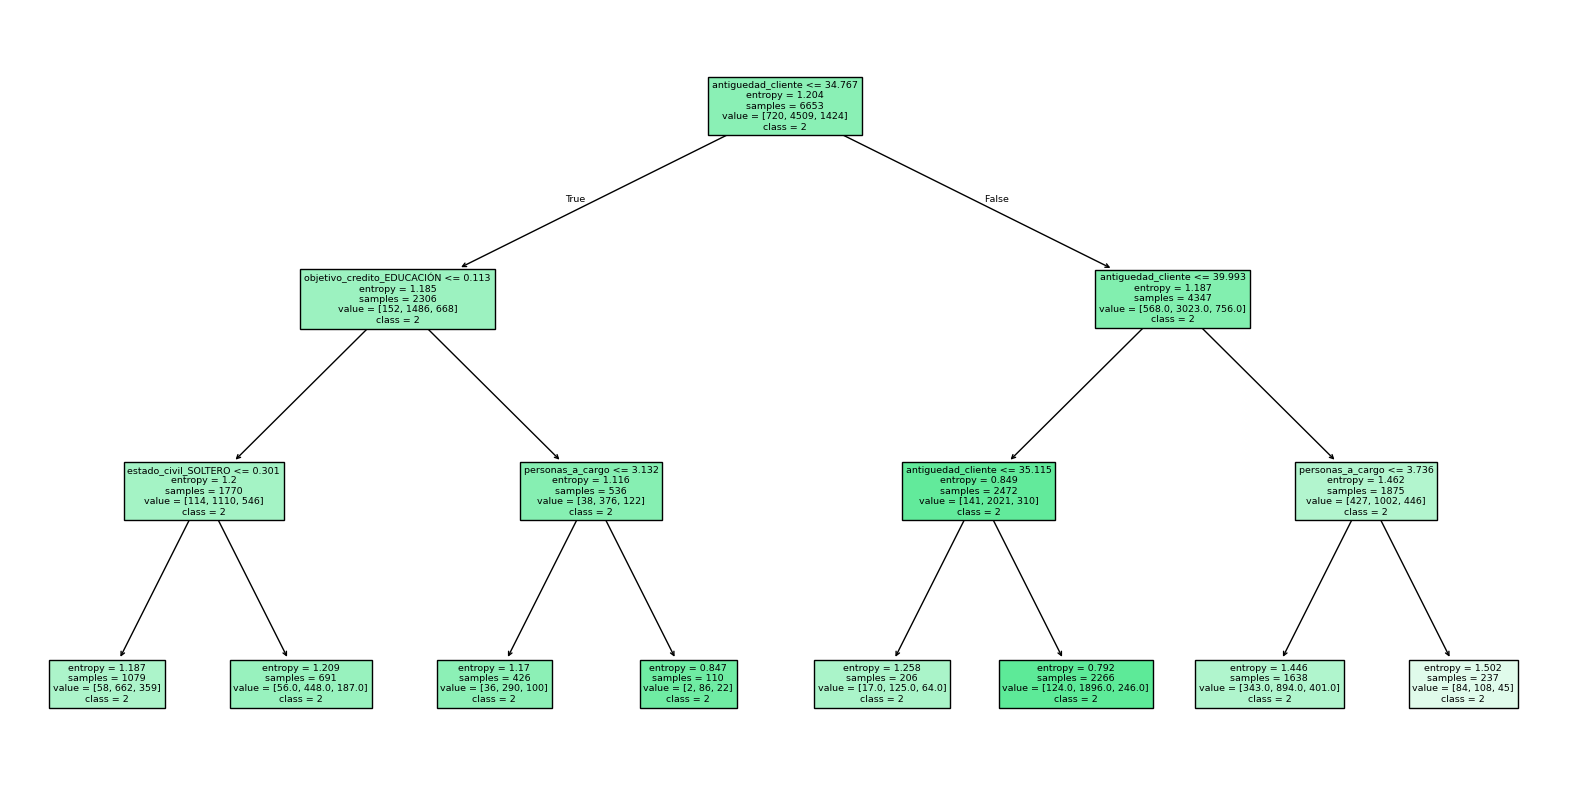

In [95]:
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(dtc2, filled=True, feature_names=data.columns, class_names=labels)
plt.show()
plt.close()

### Prueba número 3: Validación cruzada Random Kmeans 4

#### Validación cruzada

In [111]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Definir el clasificador de árbol de decisión
dt = DecisionTreeClassifier()

# Definir los parámetros a buscar
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': randint(1, 20),  # Rango para max_depth
    'min_samples_split': randint(2, 20),  # Rango para min_samples_split
    'min_samples_leaf': randint(1, 20)  # Rango para min_samples_leaf
}

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=1)

# Realizar la búsqueda aleatoria
random_search.fit(train_data2, train_labels2)

# Mostrar los mejores parámetros encontrados
print("Mejores hiperparámetros encontrados mediante RandomizedSearchCV:")
print(random_search.best_params_)

2024/07/20 19:40:21 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '3b1f90933138469e975ca9951b1027c0', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/07/20 19:40:55 INFO mlflow.sklearn.utils: Logging the 5 best runs, 95 runs will be omitted.


Mejores hiperparámetros encontrados mediante RandomizedSearchCV:
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 11, 'min_samples_split': 11, 'splitter': 'random'}


#### Ajustar modelo con hiper parámetros

In [112]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

with mlflow.start_run(run_name='Decision TreeKmeans4_rcv'):
    dtc = DecisionTreeClassifier(max_depth=3, 
                                 criterion='gini', 
                                 min_samples_split=11,
                                 min_samples_leaf=11,
                                 splitter= 'random')

    dtc.fit(train_data2, train_labels2)

    # Se finaliza el registro
    mlflow.end_run()

In [113]:
dtc

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=11,
                       min_samples_split=11, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=None,
                       splitter='random')

Rendimiento obtenido: 0.6875563570784491
Reporte de indicadores:
               precision    recall  f1-score   support

           0       0.33      0.04      0.07       216
           1       0.70      0.98      0.81      1541
           2       0.28      0.02      0.04       461

    accuracy                           0.69      2218
   macro avg       0.44      0.35      0.31      2218
weighted avg       0.58      0.69      0.58      2218

Matriz de confusión:


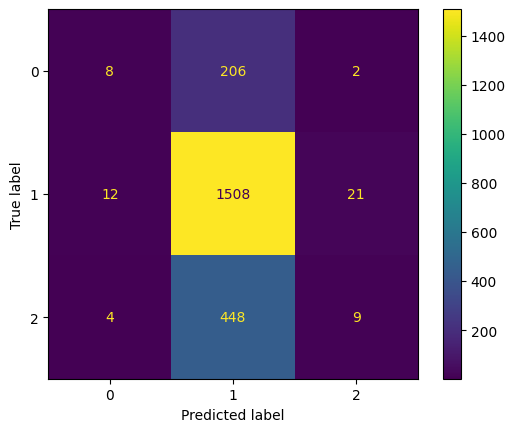

In [114]:
evaluar_modelo(dtc, test_data2, test_labels2)

#### Arbol de decision

In [115]:
# Plot the decision tree
plt.figure(figsize=(20, 10), dpi=700)

# Visualizar el árbol de decisiones
plot_tree(dtc, filled=True, feature_names=data2.columns, class_names=labels)

# Mostrar el gráfico
plt.show()

### Prueba 4: Validacion cruzada en grid Kmeans 4

#### Validación cruzada

In [116]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Definir el clasificador de árbol de decisión
dt = DecisionTreeClassifier()

# Definir los parámetros a buscar
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': randint(1, 20),  # Rango para max_depth
    'min_samples_split': randint(2, 20),  # Rango para min_samples_split
    'min_samples_leaf': randint(1, 20)  # Rango para min_samples_leaf
}

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)

# Realizar la búsqueda aleatoria
random_search.fit(train_data2, train_labels2)

# Mostrar los mejores parámetros encontrados
print("Mejores hiperparámetros encontrados mediante RandomizedSearchCV:")
print(random_search.best_params_)


2024/07/20 19:45:22 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '6bc51f19b3744b7298b1d72f3044f7fe', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/07/20 19:45:53 INFO mlflow.sklearn.utils: Logging the 5 best runs, 95 runs will be omitted.


Mejores hiperparámetros encontrados mediante RandomizedSearchCV:
{'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 17, 'min_samples_split': 13, 'splitter': 'random'}


#### Ajustar modelo con hiperparámetros

In [117]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

with mlflow.start_run(run_name='Decision TreeKmeans4_gcv'):
    dtc2 = DecisionTreeClassifier(max_depth=4, 
                                 criterion='entropy', 
                                 min_samples_split=17,
                                 min_samples_leaf=14,
                                 splitter= 'best')

    dtc2.fit(train_data2, train_labels2)

    # Se finaliza el registro
    mlflow.end_run()

In [118]:
dtc2

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=14,
                       min_samples_split=17, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=None, splitter='best')

Rendimiento obtenido: 0.6875563570784491
Reporte de indicadores:
               precision    recall  f1-score   support

           0       0.33      0.04      0.07       216
           1       0.70      0.98      0.81      1541
           2       0.28      0.02      0.04       461

    accuracy                           0.69      2218
   macro avg       0.44      0.35      0.31      2218
weighted avg       0.58      0.69      0.58      2218

Matriz de confusión:


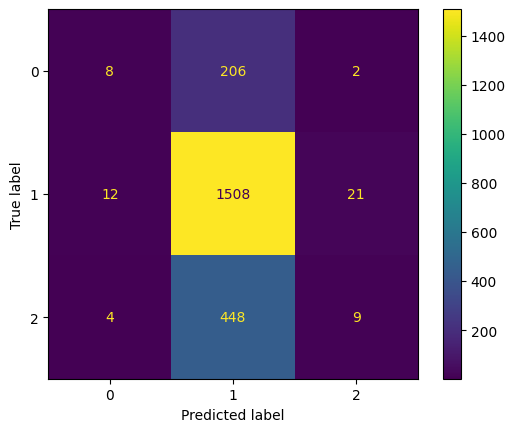

In [119]:
evaluar_modelo(dtc, test_data2, test_labels2)

#### Arbol de decisión

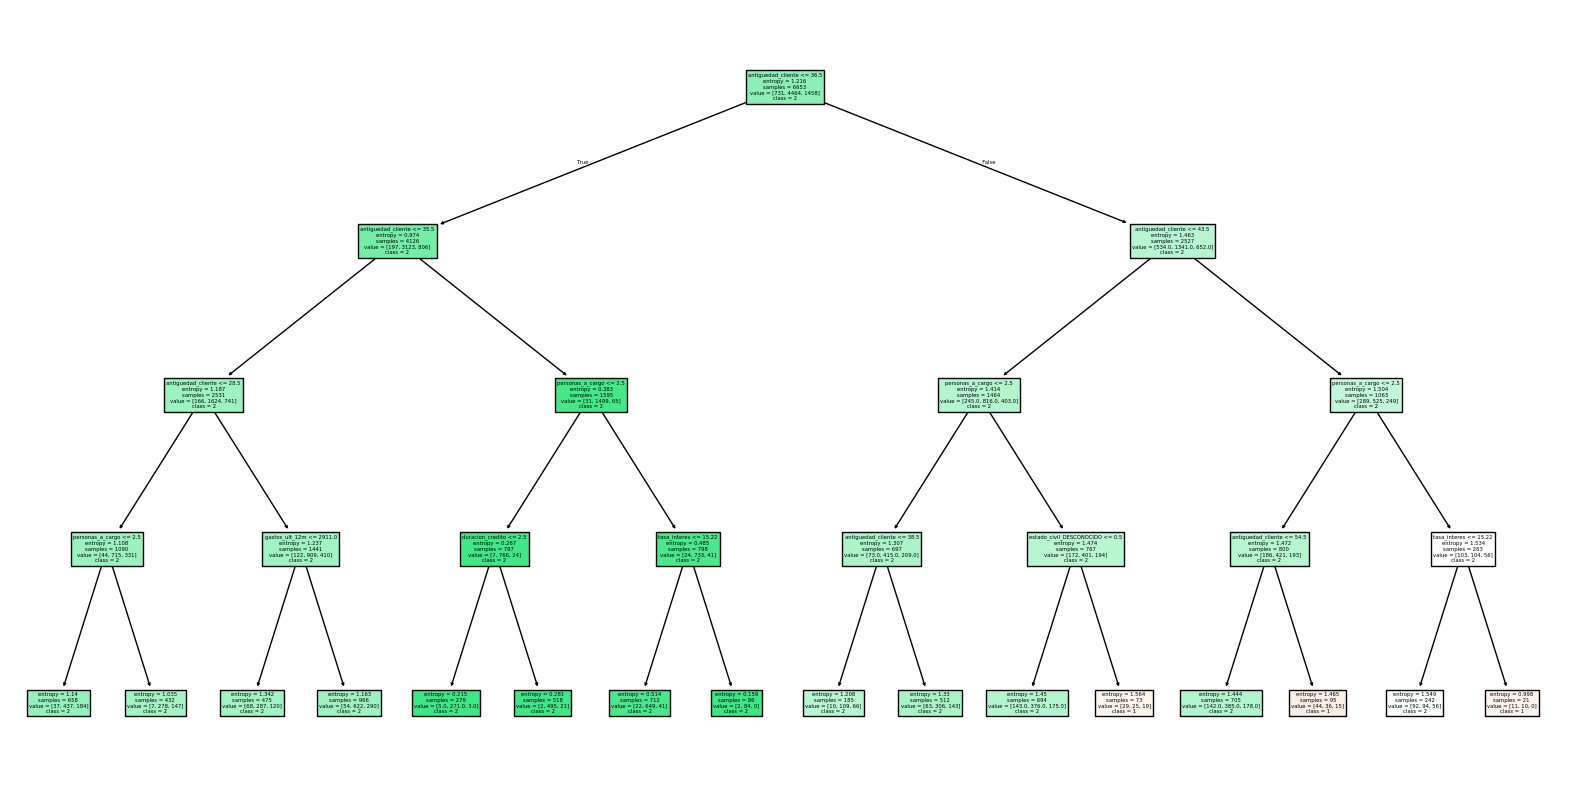

In [120]:
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(dtc2, filled=True, feature_names=data2.columns, class_names=labels)
plt.show()
plt.close()